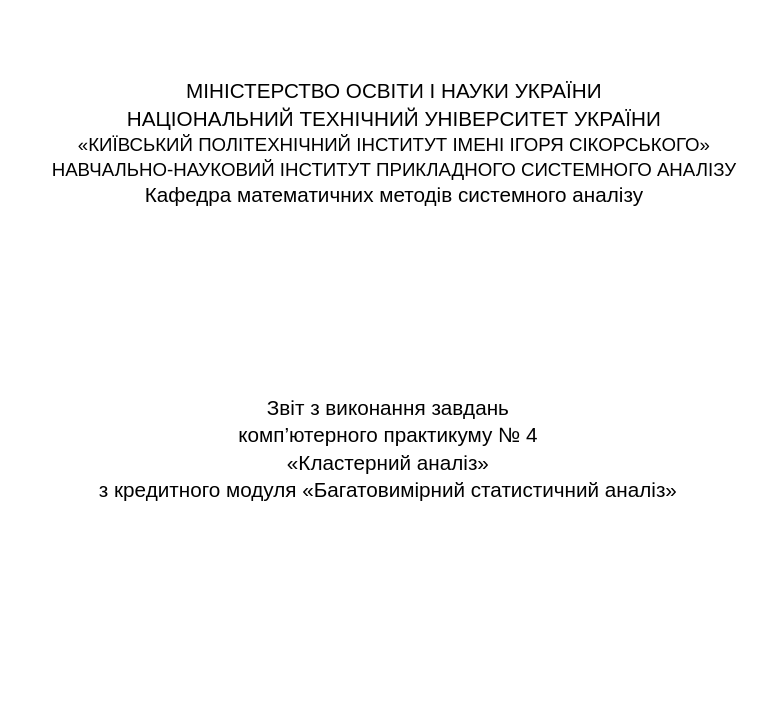

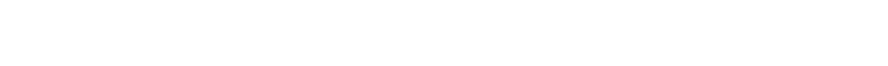

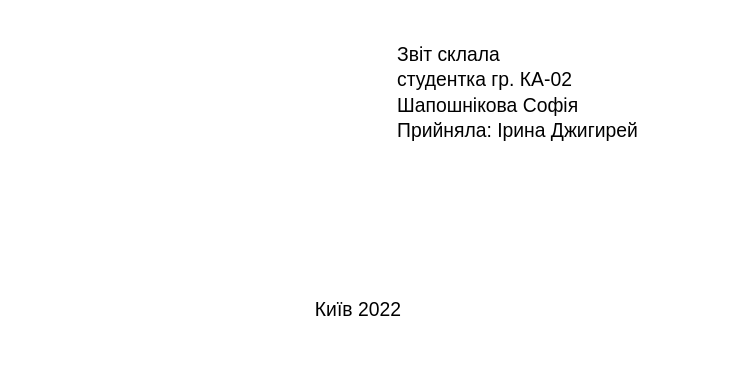

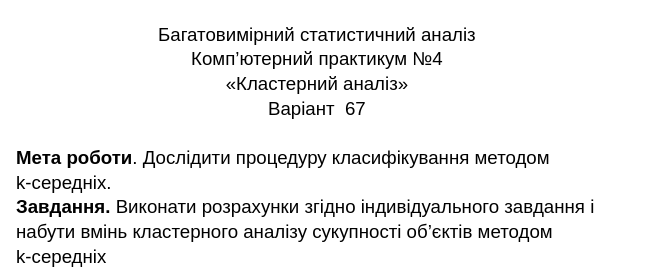

Підключимо небхідні бібліотеки:

In [10]:
# Підключимо бібліотеки для роботи з математичними обчисленнями та масивами даних
import numpy as np
import scipy as sci
# Підключимо бібліотеку для роботи з табличними даними
import pandas as pd
# Підключимо бібліотеки для побудови графіків
import seaborn as sns
import matplotlib.pyplot as plt
# Підключимо функціонал для стандартизації даних з бібліотеки sklearn
from sklearn.preprocessing import StandardScaler
# Підключимо функціонал для обчислення всіх можливих комбінацій масиву
from itertools import combinations
# підключимо фунціонал для кластеризації методом "k-середніх"
from scipy.cluster.vq import kmeans2

Завантажимо набір даних:

In [3]:
xls = pd.ExcelFile(r"БСА-67.xlsx")

In [4]:
#0 - це номер листа+1 таблиці xlsx, який плануємо зчитати
df = xls.parse(1)

In [6]:
# Виведемо перші 10 рядків таблиці
df.head(10)

,x,y
0,7.41,35.65
1,3.09,44.79
2,5.14,44.01
3,4.41,47.19
4,8.55,33.65
5,3.53,46.82
6,9.20,36.20
7,11.25,31.14
8,7.81,40.15
9,8.29,35.47


Виконаємо стандартизацію даних:

In [156]:
scaler = StandardScaler()
df["X"] = scaler.fit_transform(np.array(df["x"]).reshape(-1, 1))
df["Y"] = scaler.fit_transform(np.array(df["y"]).reshape(-1, 1))

Отже, отримали дані, розподілені за стандартним нормальним розподілом:

In [159]:
round(df[["X","Y"]].mean(axis=0))

X    0.0
Y   -0.0
dtype: float64

In [160]:
round(df[["X","Y"]].std(axis=0))

X    1.0
Y    1.0
dtype: float64

### Кластеризування методом k-середніх
 Завдання:
 - Виконати кластеризування об’єктів за нормованими значеннями двох ознак, а саме виконати кластеризування об’єктів методом k-середніх для заданої кількості кластерів: трьох і чотирьох. 
 - За допомогою критерію якості кластеризування визначити найкращу кількість кластерів для заданого набору об’єктів. 
 - Для визначеної кількості кластерів (тобто для найякіснішої кластеризації) виконати оцінювання ступеню впливу ознак.
 - Виконати аналіз отриманих результатів
 
 
 Звіт:
- додати початкові та нормовані значення набору даних,
- додати для трьох кластерів: діалогове вікно початкових налаштувань кластерного аналізу, матрицю міжкластерних евклідових і квадратичних евклідових відстаней, описові статистики для кожного кластеру, результати дисперсійного аналізу, складники кластерів з відстанями кожного об’єкту до центру кластеру, розрахунок значення критерію якості кластеризування;
- повторити для чотирьох кластерів;
- додати хід визначення ступеню впливу ознак.

**Матриця розсіювання**

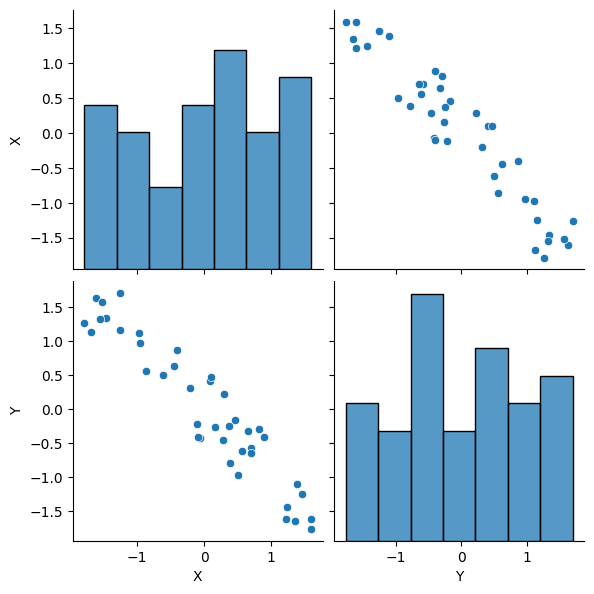

In [161]:
sns.pairplot(df[["X","Y"]], height=3)

Бачимо, що в даних важко виділити конкретну к-ть кластерів. Зробимо припущення, що найкраща к-сть це 3 або 4 кластери і перевіримо це.

Відразу створимо функції для обчислення мір відстаней та створення матриці відстаней, які знадобляться пізніше:

In [153]:
# обчислення евклідової відстані
eucl_dist = lambda i, j: np.sqrt(sum((i - j)**2))

In [154]:
# обчислення квадратичної евклідової відстані
sqeucl_dist = lambda i, j: sum((i - j)**2)

In [ ]:
# створення матриці відстаней
def eucl_dist_matr(df, dist):
    dists = {}
    combs = list(combinations(df.index, 2))
    
    for i,j in combs:
        eu_dist=dist(df.iloc[i], df.iloc[j])
        dists[i, j] = round(eu_dist, 3)
        dists[j, i] = round(eu_dist, 3)
        
    for i in range(len(df)):
        dists[i,i] = 0
    dist_matr = np.empty((len(df),len(df)))
    
    for i, j in sorted(dists.keys()):
        dist_matr[i,j] = round(dists[i,j],3)
    
    return dist_matr

In [182]:
# підрахунок суми всіх відстаней
def dist_sum(df, dist):
    dists = []
    combs = list(combinations(df.index, 2))
    
    for i,j in combs:
        dists.append(round(dist(df.iloc[i], df.iloc[j]), 3))
    
    return sum(dists)

**Кластеризування для 3 кластерів методом "k-середніх"**

In [162]:
centroid3, label = kmeans2(df[["X","Y"]], 3, minit='points')

In [163]:
pd.DataFrame(centroid3)

,0,1
0,0.342342,-0.282561
1,1.404590,-1.490370
2,-1.166902,1.128660


In [164]:
df["label"]= label

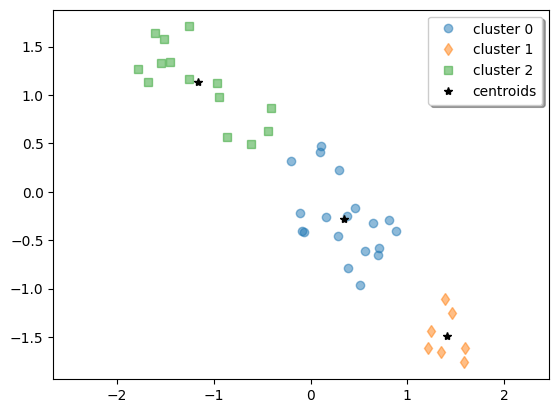

In [166]:
w0 = df[df["label"] == 0][["X","Y"]]
w1 = df[df["label"] == 1][["X","Y"]]
w2 = df[df["label"] == 2][["X","Y"]]

plt.plot(w0.iloc[:, 0], w0.iloc[:, 1], 'o', alpha=0.5, label='cluster 0')
plt.plot(w1.iloc[:, 0], w1.iloc[:, 1], 'd', alpha=0.5, label='cluster 1')
plt.plot(w2.iloc[:, 0], w2.iloc[:, 1], 's', alpha=0.5, label='cluster 2')
plt.plot(centroid3[:, 0], centroid3[:, 1], 'k*', label='centroids')
plt.axis('equal')
plt.legend(shadow=True)
plt.show()

Відобразимо матриці відстаней між кластерами:

In [172]:
# матриця евклідових відстаней між ценроїдами
pd.DataFrame(eucl_dist_matr(pd.DataFrame(centroid3), eucl_dist))

,0,1,2
0,0.000,1.608,2.066
1,1.608,0.000,3.670
2,2.066,3.670,0.000


In [173]:
# матриця квадратичниї евклідових відстаней між ценроїдами
pd.DataFrame(eucl_dist_matr(pd.DataFrame(centroid3), sqeucl_dist))

,0,1,2
0,0.000,2.587,4.269
1,2.587,0.000,13.472
2,4.269,13.472,0.000


Відобразимо загальні характеристики кластерів:

In [178]:
pd.DataFrame(centroid3).describe()

,0,1
count,3.000000,3.000000
mean,0.193343,-0.214757
std,1.292205,1.310831
min,-1.166902,-1.490370
25%,-0.412280,-0.886465
50%,0.342342,-0.282561
75%,0.873466,0.423050
max,1.404590,1.128660


**Кластеризування для 4 кластерів методом "k-середніх"**

In [167]:
centroid4, label = kmeans2(df[["X","Y"]], 4, minit='points')

In [168]:
pd.DataFrame(centroid4)

,0,1
0,-0.635330,0.708741
1,0.372697,-0.315679
2,1.404590,-1.490370
3,-1.511672,1.394203


In [170]:
df["label"]= label

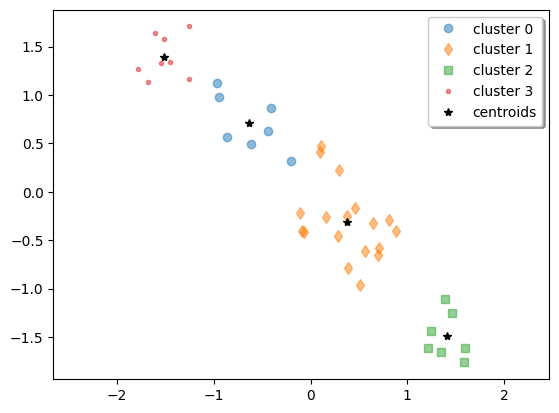

In [171]:
w0 = df[df["label"] == 0][["X","Y"]]
w1 = df[df["label"] == 1][["X","Y"]]
w2 = df[df["label"] == 2][["X","Y"]]
w3 = df[df["label"] == 3][["X","Y"]]

plt.plot(w0.iloc[:, 0], w0.iloc[:, 1], 'o', alpha=0.5, label='cluster 0')
plt.plot(w1.iloc[:, 0], w1.iloc[:, 1], 'd', alpha=0.5, label='cluster 1')
plt.plot(w2.iloc[:, 0], w2.iloc[:, 1], 's', alpha=0.5, label='cluster 2')
plt.plot(w3.iloc[:, 0], w3.iloc[:, 1], '.', alpha=0.5, label='cluster 3')
plt.plot(centroid4[:, 0], centroid4[:, 1], 'k*', label='centroids')
plt.axis('equal')
plt.legend(shadow=True)
plt.show()

Бачимо, що для 4 кластерів більш чітко відділені на графіка. Зробимо припущення, що кластеризація з k=4 найкраща. 

Відобразимо матриці відстаней між кластерами:

In [175]:
# матриця евклідових відстаней між ценроїдами
pd.DataFrame(eucl_dist_matr(pd.DataFrame(centroid4), eucl_dist))

,0,1,2,3
0,0.000,1.437,3.000,1.113
1,1.437,0.000,1.564,2.545
2,3.000,1.564,0.000,4.102
3,1.113,2.545,4.102,0.000


In [176]:
# матриця квадратичних евклідових відстаней між ценроїдами
pd.DataFrame(eucl_dist_matr(pd.DataFrame(centroid4), sqeucl_dist))

,0,1,2,3
0,0.000,2.066,8.997,1.238
1,2.066,0.000,2.445,6.475
2,8.997,2.445,0.000,16.825
3,1.238,6.475,16.825,0.000


Відобразимо загальні характеристики кластерів:

In [179]:
pd.DataFrame(centroid3).describe()

,0,1
count,3.000000,3.000000
mean,0.193343,-0.214757
std,1.292205,1.310831
min,-1.166902,-1.490370
25%,-0.412280,-0.886465
50%,0.342342,-0.282561
75%,0.873466,0.423050
max,1.404590,1.128660


**Критерій якості кластеризування**

З допомогою критерію якості кластеризування (відношення внутрішньокласової відстані до середньої міжкластерної відстані), визначимо яка кількість кластерів оптимальна:

$Q = \frac{d_w}{n_w} : \frac{d_b}{n_b}$, де:
- $d_w -$ суми внутрішніх відстаней; 
- $n_w -$ к-ть внутр. відстаней; 
- $d_b -$ суми міжкластерних відстаней; 
- $n_b -$ к-ть міжкластерних відстаней

Створимо функцію для підрахунку метрики "критерій якості кластеризування"

In [204]:
def clustering_quality(df, centroid_df, dist):
    nw, nb = len(list(combinations(df.index, 2))), len(list(combinations(centroid_df.index, 2)))
    dw = dist_sum(df, dist)
    db = dist_sum(centroid_df, dist)
    return dw/nw * nb/db

Використаємо евклідову відстань:

In [205]:
clustering_quality(df[["X","Y"]],pd.DataFrame(centroid3), eucl_dist)

0.6932985587397353

In [206]:
clustering_quality(df[["X","Y"]],pd.DataFrame(centroid4), eucl_dist)

0.7400021241747862

Використаємо квадратичну евклідову відстань:

In [207]:
clustering_quality(df[["X","Y"]],pd.DataFrame(centroid3), sqeucl_dist)

0.6054560969333694

In [208]:
clustering_quality(df[["X","Y"]],pd.DataFrame(centroid4), sqeucl_dist)

0.6469910917553244

Як бачимо, для заданого набору даних найякіснішою є кластеризація з 3 кластерами

**Результати дисперсійного аналізу для 3 кластерів**

SS - Sum of Squares, 
signif. p - ступінь значимості

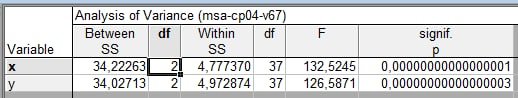

**Оцінювання ступеню впливу ознак**

Ступінь впливу ознак - відношення функції Фішера,
розрахованої емпірично на основі внутрішніх і міжкластерних відстаней
у деякому наборі об’єктів, до функції Фішера, обчисленої теоретично за
відповідних ступенів свободи вибірки для внутрішніх і міжкластерних
відстаней за умови рівності їхніх дисперсій

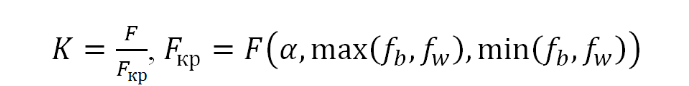

$f_b$ та $f_w$ - число ступенів свободи міжкластерних та
внутрішньокластерних відстаней. Чим більше значення K для певної
змінної, тим вищою є ступінь впливу цієї ознаки на хід та результати
кластеризування

Знайдемо занчення функції Фішера для 3 кластерів: $\alpha = 0.01, f_w = 40-3=37, f_b=3-1=2$ 

In [2]:
from scipy.stats import f

In [19]:
# F critical
F_сr = f.ppf(q=1-.01, dfn=37, dfd=2)

In [20]:
print(F_сr)

99.47213789351846


In [21]:
F_x = 132.5245
F_y = 126.5871

In [22]:
F_x / F_сr 

1.3322775885430647

In [23]:
F_y / F_сr 

1.2725885125290781

Таким чином, бачимо що змінна x має більший ступінь впливу на кластеризування, ніж y

### Висновки


Під час виконання роботи було поюудовано матрицю розсіювання, виконано кластеризування методом k-середніх для 3 і 4 кластерів, обчислено матриці міжкластерних евклідових і квадратичних евклідових відстаней. За допомогою критерію якості кластеризування визначено, що найкраща кількість кластерів для заданого набору об’єктів - 3. Було виконано оцінювання ступеню впливу ознак з використанням результатів дисперсійного аналізу та розподілу Фішера з 37 та 2 ступенями вільності. Виявлено, що змінна х має більший вплив на кластеризування, ніж у